In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

## Load and transform data

In [34]:
train_df = pd.read_csv("data/downsampled/train.csv")
test_df = pd.read_csv("data/downsampled/test.csv")
n_cols = len(train_df.columns)
x_train = train_df.iloc[:,0:n_cols-1].values
y_train = train_df.iloc[:, n_cols-1:].values
y_train = np.squeeze(y_train)
x_test = test_df.iloc[:,0:n_cols-1].values
y_test = test_df.iloc[:, n_cols-1:].values
y_test = np.squeeze(y_test)

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

## Construct and train network

In [20]:
n_feat = x_train.shape[1]

inputs = Input(shape=(n_feat,))
x = Dense(64, activation="relu")(inputs)
x = Dense(32, activation="relu")(x)
predictions = Dense(3, activation="softmax")(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Fit the training data.

In [28]:
batch_size = 128
epochs = 5

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1, shuffle=True);

Train on 15138 samples, validate on 1683 samples
Epoch 1/5
15138/15138 [==============================] - 0s 9us/step - loss: 0.6960 - acc: 0.6785 - val_loss: 0.7139 - val_acc: 0.6566
Epoch 2/5
15138/15138 [==============================] - 0s 9us/step - loss: 0.6945 - acc: 0.6774 - val_loss: 0.7145 - val_acc: 0.6619
Epoch 3/5
15138/15138 [==============================] - 0s 9us/step - loss: 0.6923 - acc: 0.6795 - val_loss: 0.7217 - val_acc: 0.6578
Epoch 4/5
15138/15138 [==============================] - 0s 9us/step - loss: 0.6916 - acc: 0.6805 - val_loss: 0.7164 - val_acc: 0.6530
Epoch 5/5
15138/15138 [==============================] - 0s 8us/step - loss: 0.6910 - acc: 0.6803 - val_loss: 0.7130 - val_acc: 0.6566


## Plotting

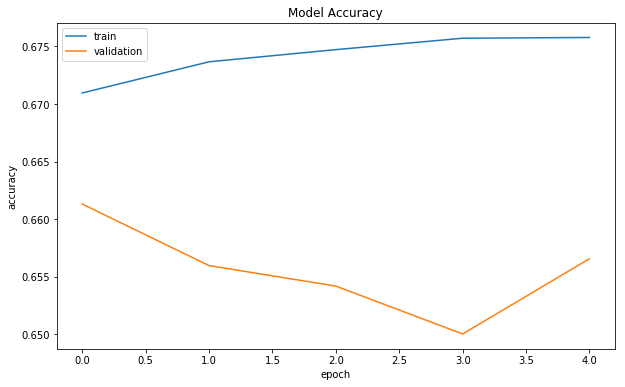

In [24]:
plt.figure(figsize=(10,6))
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left');


## Test Data

In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7255478915964487
Test accuracy: 0.6590373144928303
